<a href="https://colab.research.google.com/github/Aleena24/reinforcement-learning/blob/main/MAB_with_UCB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate slot machines (bandits)

**Simulating Slot Machines:** 5 slot machines are defined, each with different chances of giving a reward (true_probs). The pull_machine() function simulates pulling a machine and returns 1 (reward) or 0 (no reward) based on the machine's probability.

In [46]:
n_machines = 3
true_probs = [0.67, 0.45, 0.55]
n_rounds = 100

def pull_machine(machine_idx):
    return 1 if np.random.rand() < true_probs[machine_idx] else 0


# UCB Algorithm


UCB Variables:

*   n_pulls: Tracks how many times each machine has been played.
*   sum_rewards: The sum of rewards collected from each machine.
*   average_rewards: This array stores the average reward for each machine.
*   total_reward: This variable tracks the total reward accumulated over all rounds for all machines.
*   ucb_values: The UCB score for each machine, used to decide which machine to play next.
*   rewards_history: This list stores the cumulative total reward at each round.







In [47]:
n_pulls = np.zeros(n_machines)
sum_rewards = np.zeros(n_machines)
average_rewards = np.zeros(n_machines)
total_reward = 0
ucb_values = np.zeros(n_machines)
rewards_history = []

UCB Score Calculation: In each round, for each machine:

If the machine has been played before, the algorithm calculates its UCB value; otherwise, the machine is given an infinite UCB value to encourage exploration.


The UCB value is designed to balance exploration and exploitation. Machines with higher rewards or higher uncertainty will get higher UCB values and will be selected more often.

In [48]:
for t in range(1, n_rounds + 1):

    for i in range(n_machines):
        if n_pulls[i] > 0:

            average_rewards[i] = sum_rewards[i] / n_pulls[i]

            ucb_values[i] = average_rewards[i] + np.sqrt((2 * np.log(t)) / n_pulls[i])
        else:

            ucb_values[i] = float('inf')



    machine_idx = np.argmax(ucb_values)

    reward = pull_machine(machine_idx)

    n_pulls[machine_idx] += 1
    sum_rewards[machine_idx] += reward
    total_reward += reward
    rewards_history.append(total_reward)

np.argmax() is a function from the NumPy library that returns the index of the maximum value in a given array. It essentially tells you where the highest value is located in an array.

In [49]:
print(f"Total Reward: {total_reward}")

n_pulls_rounded = np.round(n_pulls).astype(int)
print(f"Number of times each machine was played: {n_pulls_rounded}")

average_rewards_rounded = np.round(average_rewards * 100).astype(int)
print(f"Estimated probabilities of rewards: {average_rewards_rounded}%")


Total Reward: 63
Number of times each machine was played: [48 23 29]
Estimated probabilities of rewards: [72 52 59]%


# Visualization

Number of Times Each Machine is Played: Initially, the algorithm explores all machines, but over time, it starts exploiting the best machine (the one with the highest probability of reward).

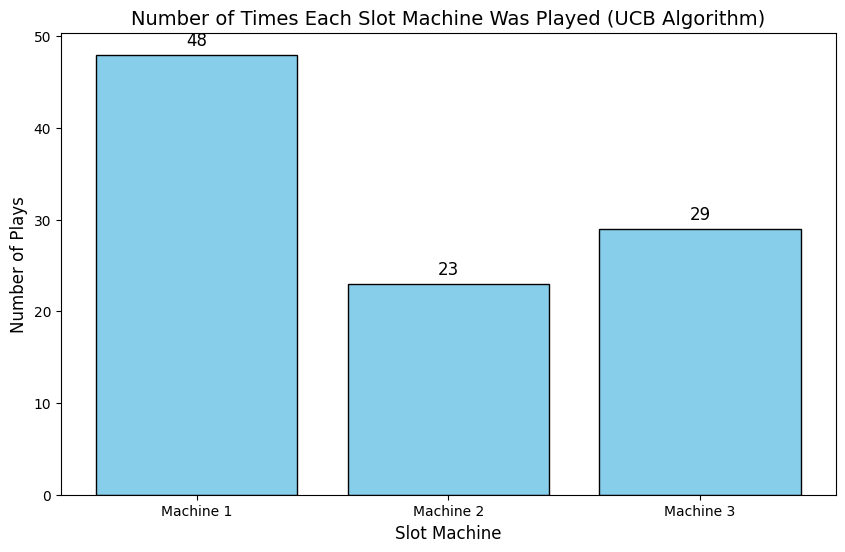

In [50]:
machine_names = [f'Machine {i+1}' for i in range(n_machines)]

plt.figure(figsize=(10, 6))
plt.bar(machine_names, n_pulls_rounded, color='skyblue', edgecolor='black')

plt.title('Number of Times Each Slot Machine Was Played (UCB Algorithm)', fontsize=14)
plt.xlabel('Slot Machine', fontsize=12)
plt.ylabel('Number of Plays', fontsize=12)

for i, val in enumerate(n_pulls_rounded):
    plt.text(i, val + 1, str(val), ha='center', fontsize=12)

plt.show()


Total Reward Over Time: The total reward increases over time as the UCB algorithm learns which machine gives the best rewards and focuses on playing that machine more often.

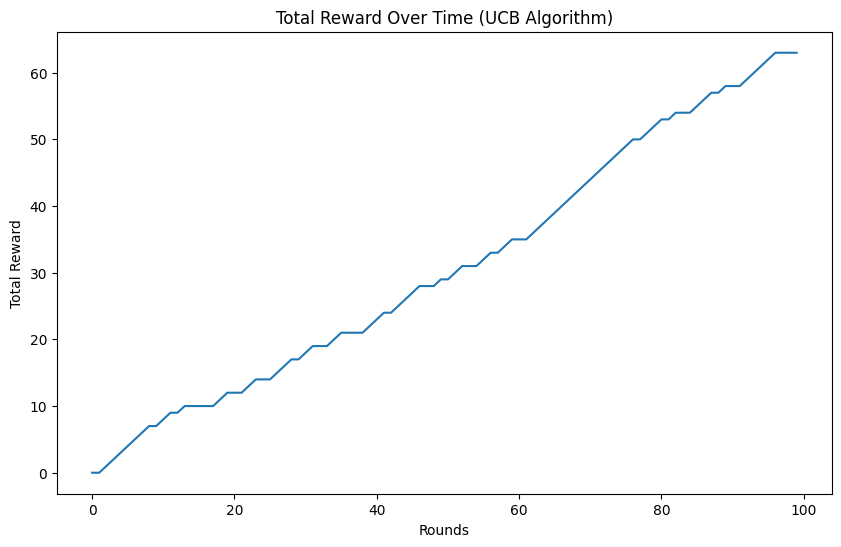

In [51]:
plt.figure(figsize=(10,6))
plt.plot(rewards_history)
plt.title('Total Reward Over Time (UCB Algorithm)')
plt.xlabel('Rounds')
plt.ylabel('Total Reward')
plt.show()